In [2]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np
import warnings

warnings.simplefilter('ignore')

In [3]:
import pandas as pd
data1 = pd.read_csv("DP1.csv") 

In [4]:
X = data1.iloc[:,0:20]
y = data1.iloc[:,20]

In [5]:
arr = np.array([])
y_true1 = np.append(arr,y)
y_true = np.round_(y_true1,decimals=0)
y_true

array([16., 28., 29., ..., 37., 39., 32.])

In [6]:
#construct the model
from sklearn.linear_model import ElasticNet

lr = LinearRegression()
elasticnet =ElasticNet(random_state=1)
svr_lin = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, elasticnet], 
                           meta_regressor=svr_rbf)

In [7]:
import numpy as np
stregr.fit(X, y)
empty_array = np.array([])
# stregr.predict gives the predicted target values
y_pred = np.append(empty_array,stregr.predict(X))   
y_predi = np.round_(y_pred,decimals=0)
y_predi

array([27., 27., 31., ..., 36., 40., 31.])

In [8]:
def countingofcorrectpredictions(y_true,y_predi):
    count=0
    for i in range(len(y_true)):
        if y_predi[i]==y_true[i]:     #correctly classified
            count+=1
    return count        
                                  
if __name__=="__main__":
    mean1 = np.mean((stregr.predict(X) - y) ** 2)  #average of error
    var1 = stregr.score(X, y)    #variance 
    count1 = countingofcorrectpredictions(y_true,y_predi)
    cm = confusion_matrix(y_predi, y_true)
    print("correctly predicted: %d" %count1)
    accuracy = (count1/4200)*100
    print("Mean Squared Error: %.4f" % mean1)
    print("Variance Score: %.4f" % var1)
    print("Accuracy by correct predictions: %.4f" %accuracy)

correctly predicted: 1356
Mean Squared Error: 6.3750
Variance Score: 0.8439
Accuracy by correct predictions: 32.2857


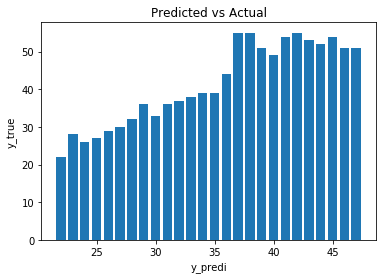

In [9]:
plt.bar(y_predi,y_true)
plt.title("Predicted vs Actual")
plt.xlabel("y_predi")
plt.ylabel("y_true")
plt.show()